# 분류 : K-폴드 교차 검증

## #01. 개요

### 01. 머신러닝을 구현하는 과정에서의 대표적 문제점.

1. 과대적합(Overfitting) : 학습 데이터를 과하게 학습하는 것
2. 과소적합(Underfitting) : 학습 데이터를 충분히 학습하지 못하는 것
3. Sample loss 문제 : 학습 데이터가 적은 경우 발생하는 문제
    - 데이터를 Train용과 Test용으로 나누는 과정에서 Train 데이터가 부족해지기 때문에 발생

위와 같은 상황에서 학습이 발생시키는 에러를 과소 추정하지 않으면서 데이터의 손실을 최소화하는 방법으로 k-폴드 교차 검증이 존재.
> 핵심은 데이터를 늘려야한다는 것

### 02. K-폴드 교차 검증 예시

'k'가 5인 경우에 대한 예시

![img](res/grid_search_cross_validation.png)

Fold가 5로 이루어져 있다.

하나의 데이터 셋(전체 데이터 셋)을 5등분하여 각 Fold마다 한 번씩 Test 데이터가 되도록 train_split을 개별 수행.

그 결과 총 5번의 학습이 가능해지며 그 학습 결과에 대한 평균치(혹은 최대치)를 구한다.

## #02. 패키지

In [2]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 분류 결과 평가를 위한 패키지
from sklearn.metrics import accuracy_score

# 교차검증 패키지
from sklearn.model_selection import cross_val_score

## #03. 데이터

### 1. 데이터 셋 준비

In [3]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. 라벨링

In [4]:
labels = {'setosa':0, "versicolor":1, "virginica":2}
classes = {0:'setosa', 1:"versicolor", 2:"virginica"}

In [5]:
df = origin.copy()
df['Species'] = df['Species'].map(labels)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 독립변수(feature), 종속변수(label) 분리

In [6]:
x = df.drop('Species', axis=1)
y = df['Species']
x.shape, y.shape

((150, 4), (150,))

## #04. K-Fold 교차검증을 수행하는 모델링

분류모델 구축

### K-Fold만 적용한 경우

In [13]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# # 기존 코드
# knn.fit(x,y)    #학습
# y_pred = knn.predict(x) #예측값
# score = accuracy_score(y, y_pred)

# 교차검증
score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')

# 교차검증 결과 : 10개의 fold를 나누어서 10번 학습/평가를 수행
print("score:",score)

# 10개의 정확도 평균
print("score_mean:",score.mean())

score: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
score_mean: 0.9666666666666668


In [12]:
# ?cross_val_score

### 최적의 k값 찾기

In [17]:
k_range = range(1,101)
k_scores = []

# 총 1000번의 knn을 수행한다.
for k in k_range:   #knn 검증을 100번 수행
    knn = KNeighborsClassifier(n_neighbors=k)
    # 교차검증
    score = cross_val_score(knn, x, y, cv=10, scoring='accuracy')   #knn 10번 수행
    # 10개의 정확도 평균
    # print("score_mean:",score.mean())
    k_scores.append(score.mean())
k_scores
# 어느 순간부터 계산하지 않는 구간이 나오는데 이 중에서 가장 높은 값을 가지는 순간을 확인

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9400000000000001,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001,
 0.9266666666

#### 가장 높은 정확도를 갖는 k값 찾기

##### 일반 코딩(최대 값 찾기 알고리즘)

In [19]:
max_acc = k_scores[0]
max_index = 0

for i in range(1,len(k_scores)):
    if max_acc < k_scores[i]:
        max_acc = k_scores[i]
        max_index = i
print("최대 정확도 : {0}, 최대 정확도를 갖는 k : {1}".format(max_acc, max_index+1))

최대 정확도 : 0.9800000000000001, 최대 정확도를 갖는 k : 13


##### 파이썬 내장함수 활용

In [31]:
max_acc = max(k_scores)
max_index = k_scores.index(max_acc)

print("최대 정확도 : {0:.2f}, 최대 정확도를 갖는 k : {1}".format(max_acc, max_index+1))

최대 정확도 : 0.98, 최대 정확도를 갖는 k : 13


### 학습과정 시각화

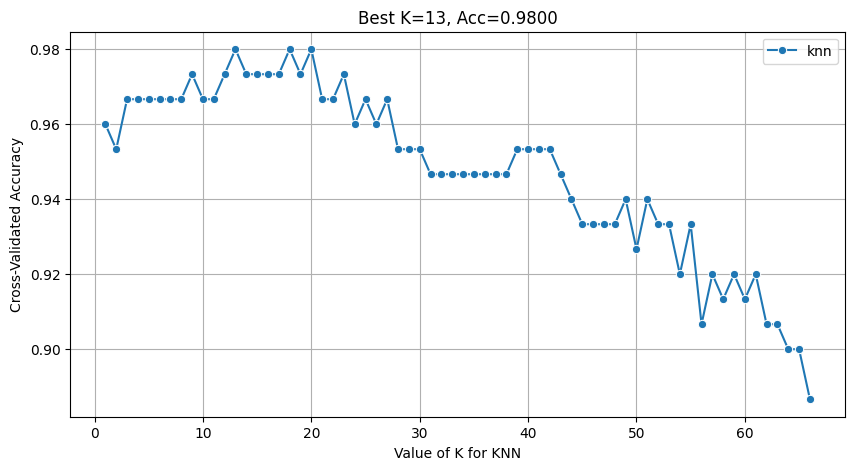

In [35]:
plt.figure(figsize=(10,5))

sb.lineplot(x=k_range, y=k_scores, marker='o', label='knn')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Best K={0}, Acc={1:.4f}".format(max_index+1, max_acc))

plt.grid()
plt.show()
plt.close()